In [2]:
from logistics4_3 import * 

Modelling time: 0.00021409988403320312


In [3]:
Point2D._IDX = 0
s = Solver()

In [76]:
def gen_stripe(length):
    points = []
    for i in range(length):
        p = Point2D()
        if len(points) > 0:
            s.add(neighs(points[-1], p))
        points.append(p)
    return points

In [154]:
def fix_ends(points, start, finish):
    s.add(points[0] == start)
    s.add(points[-1] == finish)

In [77]:
def no_self_intersections(points):
    for i,p1 in enumerate(points):
        for p2 in points[i+1:]:
            s.add(Not(p1 == p2))

In [78]:
def no_intersections(points1, points2):
    for p1 in points1:
        for p2 in points2:
            s.add(Not(p1 == p2))

In [104]:
import matplotlib.pyplot as plt
def plot_points(pts, color='b'):
    xs = []
    ys = []
    for p in pts:
        xs.append(s.model().eval(p.x).as_long())
        ys.append(s.model().eval(p.y).as_long())
    plt.plot(xs, ys, '*-', color=color)

In [170]:
def forget():
    try:
        s.pop()
    except Z3Exception:
        pass
    s.push()

In [183]:
def solve(size):
    points_red = gen_stripe(size)
    points_green = gen_stripe(size)
    points_blue = gen_stripe(size)

    no_self_intersections(points_red)
    no_self_intersections(points_green)
    no_self_intersections(points_blue)
    no_intersections(points_red, points_green)
    no_intersections(points_red, points_blue)
    no_intersections(points_green, points_blue)

    fix_ends(points_red, (0,0), (4, 4))
    fix_ends(points_green, (0,2), (4, 2))
    fix_ends(points_blue, (0,4), (4, 0))

    t1 = time()
    chk = s.check()
    t2 = time()
    dt = t2 - t1
    if chk.r == 1:
        pass
        #print('sat in ', dt)
    else:
        #print('unsat in', dt)
        return False, dt

    plot_points(points_red, color='r')
    plot_points(points_green, color='g')
    plot_points(points_blue, color='b')
    plt.title(f'Size={size}, t={dt}')
    return True, dt

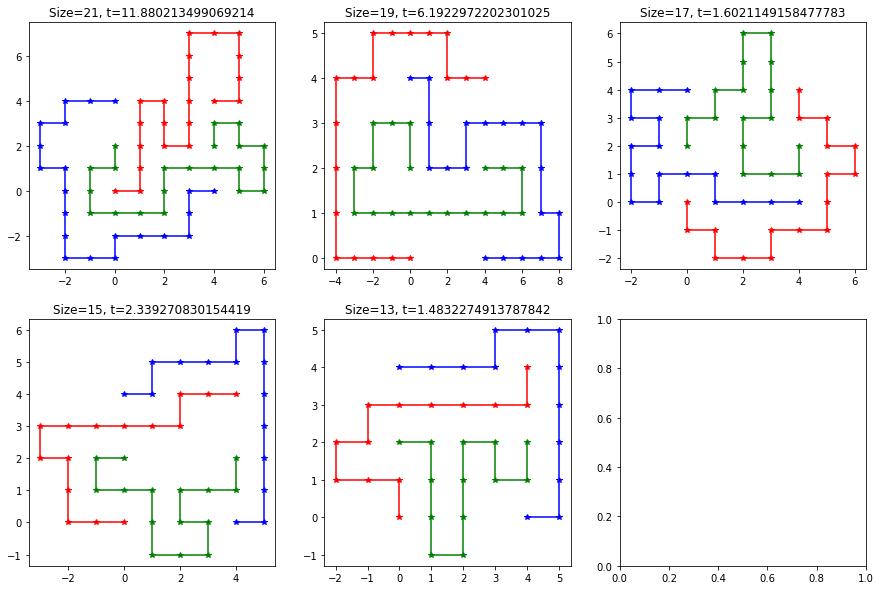

In [186]:
S = 21
dts = []
k = 1
while True:
    forget()
    plt.subplot(2,3, k)
    res, dt = solve(S)
    dts.append(dt)
    if not res:
        break
    S -= 2
    k += 1
plt.gcf().set_size_inches(15,10)

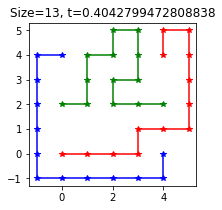

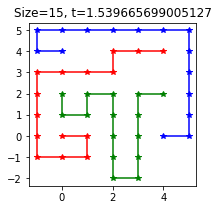

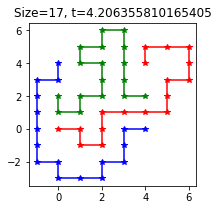

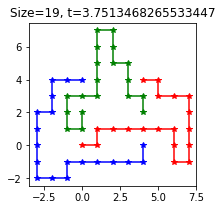

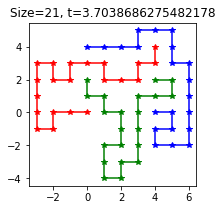

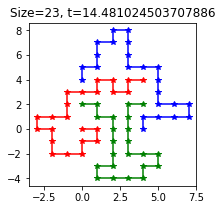

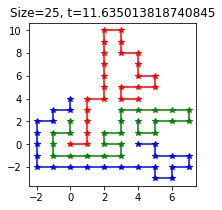

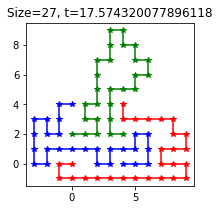

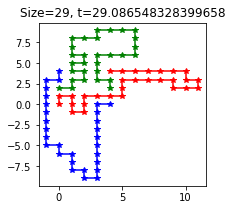

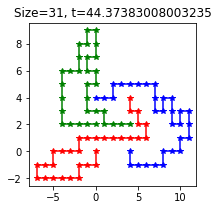

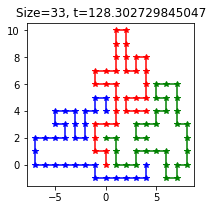

In [187]:
S=13
ss = []
dts = []
while True:
    forget()
    res, dt = solve(S)
    plt.show()
    dts.append(dt)
    ss.append(S)
    if not res:
        break
    S += 2
    


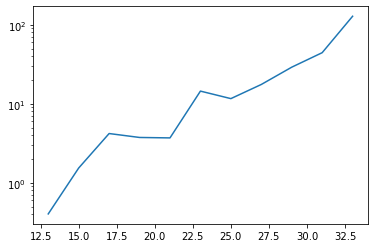

In [193]:
plt.plot(ss, dts)
plt.yscale('log')

In [190]:
ss= ss[:-1]

In [191]:
dts = dts[:-1]